In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [361]:
df_train=pd.read_csv('titanic_train.csv')
df_test=pd.read_csv('titanic_test.csv')
combine=[df_train,df_test]

In [362]:
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [363]:
pd.isnull(df_test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [583]:
df_train.head()

,Q,S,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Sex_encod,fm
0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.00,7.25,S,0.16,0.19,1
1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,71.28,C,0.79,0.74,1
2,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.00,7.92,S,0.70,0.74,0
3,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,53.10,S,0.79,0.74,1
4,0,1,5,0,3,"Allen, Mr. William Henry",male,35.00,8.05,S,0.16,0.19,0


In [365]:
cat_lis=[feature for feature in df_train.columns if len(df_train[feature].unique())<25]
obj_lis=[feature for feature in df_train.columns if df_train[feature].dtype=='O' and feature not in cat_lis]


In [366]:
cat_lis
obj_lis.append('Survived')
#Following is a list of categorical variables

In [367]:
#now lets get some info on these features
# and then find out the correlation between these variables and the outcome

df_train[obj_lis].describe(include=[object])

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Emir, Mr. Farred Chehab",347082,B96 B98
freq,1,7,4


In [368]:
#every name is unique 
# ticket contains 210 duplicate values
#ticket column is not that useful

In [369]:
def intcon(x):
    try:
        int(x)
        return True
    except:
        return False

In [370]:
pd.set_option("display.max_rows", None)
for data in combine:
    data['Ticket_type']=np.where(data.Ticket.apply(intcon)==True,1,0)

In [371]:
combine=[df_train,df_test]

In [372]:

df_train.groupby('Ticket_type').mean()['Survived']

Ticket_type
0   0.38
1   0.38
Name: Survived, dtype: float64

In [373]:
#no insights can be derived from ticket feature so we drop it

In [374]:
for data in combine:
    data.drop(['Ticket','Ticket_type'],axis=1,inplace=True)

In [375]:
combine=[df_train,df_test]

In [376]:
pd.isnull(df_train.Cabin).sum()

687

In [377]:
#cabin has too many missing values so we drop it

In [378]:
for data in combine:
    data.drop(['Cabin'],axis=1,inplace=True)

In [379]:
combine=[df_train,df_test]

In [380]:
#comming to name feature

In [381]:
def extract(name):
    for i,x in enumerate(name):
        if x==',':
            y=i
        
        elif x=='.':
            z=i
            break
            
    return name[y+2:z]
    

In [382]:
for data in combine:
    data['Title']=data['Name'].apply(extract)

In [383]:
combine=[df_train,df_test]

<AxesSubplot:xlabel='Title'>

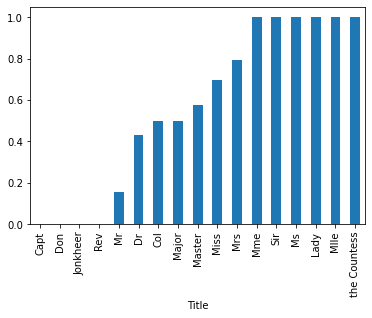

In [384]:
df_train.groupby('Title').mean()['Survived'].sort_values().plot.bar()

In [385]:
#this seems to be highly correlated so we can keep this feature

In [386]:
# we will mean encode the Title feature

In [387]:
mapper=dict(df_train.groupby('Title').mean()['Survived'])

<AxesSubplot:xlabel='Title', ylabel='count'>

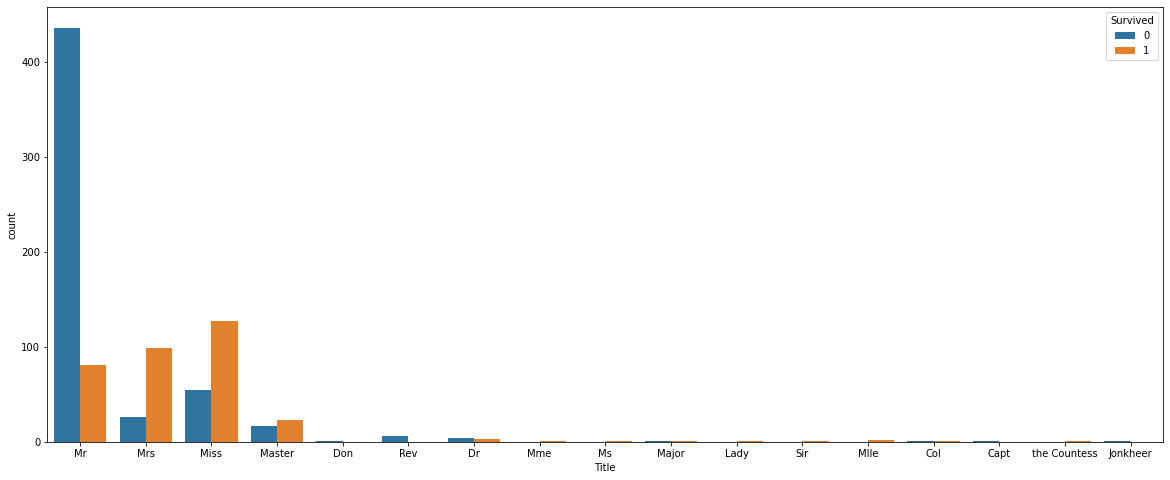

In [388]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_train,x='Title',hue='Survived')

In [389]:
for data in combine:
    data['Title']=data['Title'].map(mapper)

In [390]:
combine2=[df_train,df_test]

In [391]:
#now that we are finished with obj type columns with >25 values lets move onto categorical features

In [392]:
cat_lis

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [393]:
# lets analyze each of these features one by one

In [394]:
df_train.groupby('Pclass').mean()['Survived']

Pclass
1   0.63
2   0.47
3   0.24
Name: Survived, dtype: float64

In [395]:
#we can see that pclass is an ordinal lable with the values of survived going down as the class value increases


<AxesSubplot:xlabel='Pclass'>

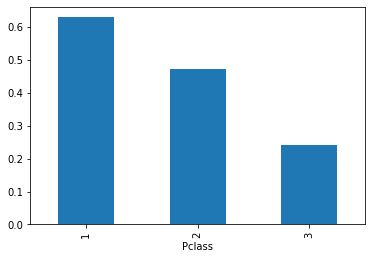

In [396]:
df_train.groupby('Pclass').mean()['Survived'].plot.bar()

In [397]:
# people from class upper classes had a higher chance of surviving

In [398]:
df_train.groupby('Sex').mean()['Survived']

Sex
female   0.74
male     0.19
Name: Survived, dtype: float64

In [399]:
#females clearly have a higher chance of survival so let us mean encode this column

In [400]:
mapper=dict(df_train.groupby('Sex').mean()['Survived'])

In [401]:
for data in combine2:
    data['Sex_encod']=data['Sex'].map(mapper)

In [402]:
combine2=[df_train,df_test]

In [403]:
df_train.groupby('SibSp').mean()['Survived']

SibSp
0   0.35
1   0.54
2   0.46
3   0.25
4   0.17
5   0.00
8   0.00
Name: Survived, dtype: float64

In [404]:
df_train.groupby('Parch').mean()['Survived']

Parch
0   0.34
1   0.55
2   0.50
3   0.60
4   0.00
5   0.20
6   0.00
Name: Survived, dtype: float64

In [405]:
#since both have relatively low correlation let us add them to craete a total family members group and drop the orignal featurs

In [406]:
for data in combine2:
    data['fm']=data['Parch']+data['SibSp']

In [407]:
combine2=[df_train,df_test]

In [408]:
for data in combine2:
    data.drop(['Parch','SibSp'],axis=1,inplace=True)
    

In [409]:
combine2=[df_train,df_test]

In [410]:
df_train.groupby('fm').mean()['Survived']

fm
0    0.30
1    0.55
2    0.58
3    0.72
4    0.20
5    0.14
6    0.33
7    0.00
10   0.00
Name: Survived, dtype: float64

In [411]:
#it seems those with 0 family members were most likely to die probably because they were in lower class
# let us test out this hypothesis

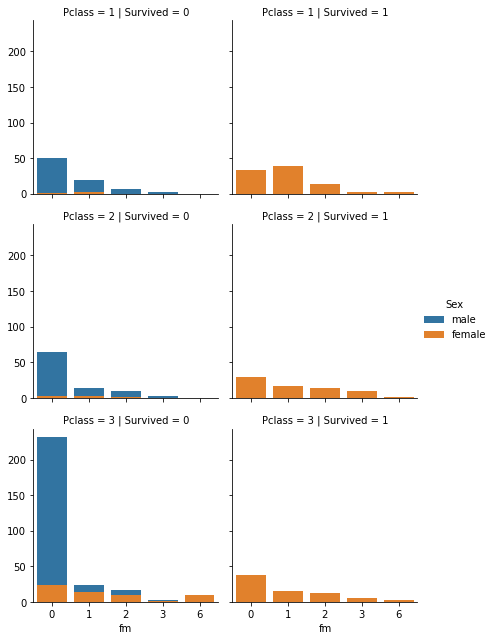

In [412]:
g=sns.FacetGrid(data=df_train,col='Survived',row='Pclass',hue='Sex')
g.map(sns.countplot,'fm')
g.add_legend()

In [413]:
#this summirizes our fidings till now 
#we see even in first class those who have survived are mostly women this could be because women and children
#are given a priroty while assigning lifeboats 
#we also see a large amount of single people in lower class hence our previous hypothesis is also confirmed

In [414]:
df_train.groupby('Embarked').mean()['Survived']

Embarked
C   0.55
Q   0.39
S   0.34
Name: Survived, dtype: float64

In [415]:
#let us one hot encode the embarked column because there is not alot of correlation

In [416]:
df_t=pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train=pd.concat([df_t,df_train],axis=1)
    


In [417]:
df_t=pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test=pd.concat([df_t,df_test],axis=1)

In [418]:
combine2=[df_train,df_test]

In [419]:
#let us move on to the numerical features with >25 unique values
#there are only two such features age and fare since passenger id does not indicate anything

In [420]:
df_train.head()

,Q,S,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Sex_encod,fm
0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.00,7.25,S,0.16,0.19,1
1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,71.28,C,0.79,0.74,1
2,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.00,7.92,S,0.70,0.74,0
3,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,53.10,S,0.79,0.74,1
4,0,1,5,0,3,"Allen, Mr. William Henry",male,35.00,8.05,S,0.16,0.19,0


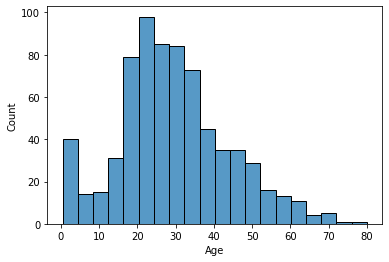

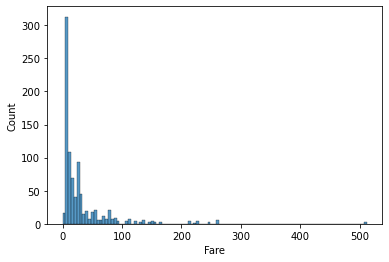

In [421]:
#let us check the distribution of both theses features
num_lis=['Age','Fare']
for x in num_lis:
    sns.histplot(data=df_train,x=x)
    plt.show()

In [422]:
#the distribution of age is vey near gausian so we will avoid normalizing

<Figure size 720x720 with 0 Axes>

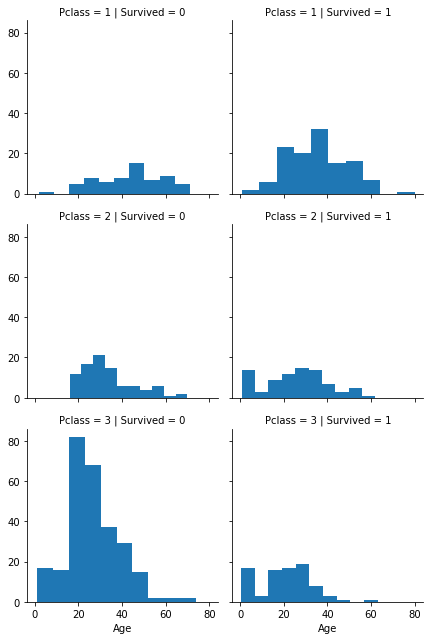

In [423]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
plt.figure(figsize=(10,10))
grid.map(plt.hist, 'Age')
grid.add_legend()

In [424]:
# most of the younger people were in Pclass 3 and hence alot of them died

In [425]:
#let us log normalize the skewed fare data 

In [426]:
data=df_train.copy()

In [427]:
data['Fare']=np.where(data['Fare']!=0,np.log(data['Fare']),0)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

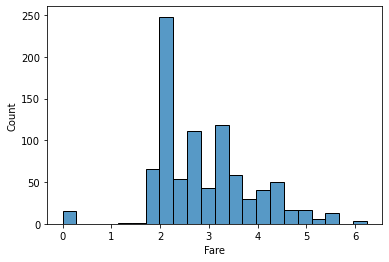

In [428]:
sns.histplot(x=data['Fare'])

In [429]:
#now to take care of the null values

In [430]:
pd.isnull(df_train).sum()

Q                0
S                0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
Title            0
Sex_encod        0
fm               0
dtype: int64

In [431]:
pd.isnull(df_test).sum()

Q               0
S               0
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
Fare            1
Embarked        0
Title           1
Sex_encod       0
fm              0
dtype: int64

In [432]:
#let us replace missing age values by mean values of that pclass
df_train.groupby('Pclass').mean()['Age']

Pclass
1   38.23
2   29.88
3   25.14
Name: Age, dtype: float64

In [433]:
def avg_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [434]:
df_train['Age']=df_train[['Age','Pclass']].apply(avg_age_train,axis=1)

In [435]:
pd.isnull(df_train).sum()

Q              0
S              0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       2
Title          0
Sex_encod      0
fm             0
dtype: int64

In [436]:
df_test.groupby('Pclass').mean()['Age']

Pclass
1   40.92
2   28.78
3   24.03
Name: Age, dtype: float64

In [437]:
def avg_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [438]:
df_test['Age']=df_test[['Age','Pclass']].apply(avg_age_test,axis=1)

In [452]:
pd.isnull(df_test).sum()

Q              0
S              0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Sex_encod      0
fm             0
dtype: int64

In [440]:
df_train.dropna(inplace=True)
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())


In [453]:
df_test['Title']=df_test['Title'].fillna(df_test['Title'].mean())

In [454]:
df1=df_train.copy()

In [455]:
df1.drop(['PassengerId','Name','Sex','Embarked'],inplace=True,axis=1)

In [456]:
df2=df_test.copy()

In [457]:
df2.drop(['PassengerId','Name','Sex','Embarked'],inplace=True,axis=1)

In [458]:
import lazypredict

In [459]:
import sklearn

In [460]:
from sklearn.model_selection import train_test_split

In [461]:
X=df1.drop('Survived',axis=1)
y=df1.Survived

In [462]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [463]:
from lazypredict.Supervised import LazyClassifier

In [464]:
lz=LazyClassifier(verbose=1,ignore_warnings=True)

In [465]:
models,predictions=lz.fit(X_train, X_test, y_train, y_test)

 14%|███████████▍                                                                       | 4/29 [00:00<00:01, 14.21it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8197278911564626, 'Balanced Accuracy': 0.8139328063241107, 'ROC AUC': 0.8139328063241107, 'F1 Score': 0.8207596265347877, 'Time taken': 0.09011292457580566}
{'Model': 'BaggingClassifier', 'Accuracy': 0.7857142857142857, 'Balanced Accuracy': 0.7721343873517786, 'ROC AUC': 0.7721343873517786, 'F1 Score': 0.7859071526325894, 'Time taken': 0.02992391586303711}
{'Model': 'BernoulliNB', 'Accuracy': 0.7789115646258503, 'Balanced Accuracy': 0.7758399209486166, 'ROC AUC': 0.7758399209486166, 'F1 Score': 0.7810311696461212, 'Time taken': 0.012931585311889648}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.826530612244898, 'Balanced Accuracy': 0.8157114624505929, 'ROC AUC': 0.815711462450593, 'F1 Score': 0.8266867426073342, 'Time taken': 0.14125466346740723}


 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:00, 22.51it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7789115646258503, 'Balanced Accuracy': 0.7648715415019762, 'ROC AUC': 0.7648715415019762, 'F1 Score': 0.7791105543034653, 'Time taken': 0.014021158218383789}
{'Model': 'DummyClassifier', 'Accuracy': 0.5578231292517006, 'Balanced Accuracy': 0.533399209486166, 'ROC AUC': 0.533399209486166, 'F1 Score': 0.5600282845255641, 'Time taken': 0.010951519012451172}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.7346938775510204, 'Balanced Accuracy': 0.7295454545454545, 'ROC AUC': 0.7295454545454545, 'F1 Score': 0.737384219224413, 'Time taken': 0.011962652206420898}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7755102040816326, 'Balanced Accuracy': 0.7639822134387352, 'ROC AUC': 0.7639822134387351, 'F1 Score': 0.7762811168423414, 'Time taken': 0.10774016380310059}
{'Model': 'GaussianNB', 'Accuracy': 0.7925170068027211, 'Balanced Accuracy': 0.7775691699604743, 'ROC AUC': 0.7775691699604743, 'F1 Score': 0.7923244436060053, 'Time taken': 0.01331949

 62%|██████████████████████████████████████████████████▉                               | 18/29 [00:00<00:00, 31.43it/s]


{'Model': 'LabelSpreading', 'Accuracy': 0.7857142857142857, 'Balanced Accuracy': 0.7684782608695653, 'ROC AUC': 0.7684782608695652, 'F1 Score': 0.7850994323474977, 'Time taken': 0.0418696403503418}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8299319727891157, 'Balanced Accuracy': 0.8202569169960474, 'ROC AUC': 0.8202569169960474, 'F1 Score': 0.830233378242746, 'Time taken': 0.013069391250610352}
{'Model': 'LinearSVC', 'Accuracy': 0.826530612244898, 'Balanced Accuracy': 0.8157114624505929, 'ROC AUC': 0.815711462450593, 'F1 Score': 0.8266867426073342, 'Time taken': 0.043988943099975586}
{'Model': 'LogisticRegression', 'Accuracy': 0.8299319727891157, 'Balanced Accuracy': 0.8220849802371542, 'ROC AUC': 0.8220849802371543, 'F1 Score': 0.8305159976078343, 'Time taken': 0.013948678970336914}
{'Model': 'NearestCentroid', 'Accuracy': 0.7925170068027211, 'Balanced Accuracy': 0.7848814229249012, 'ROC AUC': 0.7848814229249012, 'F1 Score': 0.7937044758230577, 'Time taken': 0.009074687957

 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:00<00:00, 28.54it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8299319727891157, 'Balanced Accuracy': 0.8166007905138339, 'ROC AUC': 0.816600790513834, 'F1 Score': 0.8296114875407143, 'Time taken': 0.013719558715820312}
{'Model': 'RandomForestClassifier', 'Accuracy': 0.7891156462585034, 'Balanced Accuracy': 0.7766798418972332, 'ROC AUC': 0.7766798418972332, 'F1 Score': 0.7894893890210051, 'Time taken': 0.12474489212036133}
{'Model': 'RidgeClassifier', 'Accuracy': 0.826530612244898, 'Balanced Accuracy': 0.8157114624505929, 'ROC AUC': 0.815711462450593, 'F1 Score': 0.8266867426073342, 'Time taken': 0.018583059310913086}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8231292517006803, 'Balanced Accuracy': 0.8111660079051384, 'ROC AUC': 0.8111660079051384, 'F1 Score': 0.8231292517006804, 'Time taken': 0.024584531784057617}
{'Model': 'SGDClassifier', 'Accuracy': 0.8095238095238095, 'Balanced Accuracy': 0.7801877470355731, 'ROC AUC': 0.7801877470355731, 'F1 Score': 0.805478401282023, 'Time taken': 0

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.66it/s]

{'Model': 'SVC', 'Accuracy': 0.8299319727891157, 'Balanced Accuracy': 0.8019762845849803, 'ROC AUC': 0.8019762845849804, 'F1 Score': 0.8263200011446635, 'Time taken': 0.028922557830810547}
{'Model': 'XGBClassifier', 'Accuracy': 0.7993197278911565, 'Balanced Accuracy': 0.7848320158102766, 'ROC AUC': 0.7848320158102766, 'F1 Score': 0.799133478241874, 'Time taken': 0.05471181869506836}
{'Model': 'LGBMClassifier', 'Accuracy': 0.8061224489795918, 'Balanced Accuracy': 0.7902667984189724, 'ROC AUC': 0.7902667984189724, 'F1 Score': 0.8055661530763075, 'Time taken': 0.06159329414367676}


In [466]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.83               0.82     0.82      0.83   
LinearDiscriminantAnalysis         0.83               0.82     0.82      0.83   
QuadraticDiscriminantAnalysis      0.83               0.82     0.82      0.83   
LinearSVC                          0.83               0.82     0.82      0.83   
RidgeClassifier                    0.83               0.82     0.82      0.83   
CalibratedClassifierCV             0.83               0.82     0.82      0.83   
Perceptron                         0.81               0.81     0.81      0.81   
AdaBoostClassifier                 0.82               0.81     0.81      0.82   
RidgeClassifierCV                  0.82               0.81     0.81      0.82   
NuSVC                              0.83               0.81     0.81      0.83   
SVC                         

In [467]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]


In [486]:
search=GridSearchCV(AdaBoostClassifier(),param_grid=grid,scoring='accuracy',n_jobs=-1)

In [487]:
search.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [488]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [489]:
search.best_score_

0.8312956262299244

In [492]:
adb=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 500)


In [497]:
adb.fit(X_train,y_train)
pre1=adb.predict(X_test)

In [498]:
titanic_rfc_submisssion = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": pre1})
titanic_rfc_submisssion.to_csv('titanic_rfc_submisssion5',index=False)

In [472]:
pre=search.predict(X_test)

In [473]:
from sklearn.metrics import classification_report

In [474]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       183
           1       0.76      0.76      0.76       111

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294



In [501]:
import tensorflow
from tensorflow import keras

In [502]:
from keras.layers import Dropout,Dense
from keras.models import Sequential
import kerastuner
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [559]:
def build_model_1(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Choice('units1', [10,30,50,100,500,1000]),
      activation='relu'))
    model.add(Dropout(0.3))
    model.add(keras.layers.Dense(
      hp.Choice('units2', [10,30,50,100,500,1000]),
      activation='relu'))
    model.add(Dropout(0.3))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [528]:
from kerastuner import RandomSearch

In [560]:
rc=RandomSearch(build_model_1,objective='val_accuracy',max_trials=20,overwrite=True)

In [561]:
rc.search(X_train,y_train,epochs=10,validation_split=0.25)

Trial 20 Complete [00h 00m 03s]
val_accuracy: 0.7174887657165527

Best val_accuracy So Far: 0.7533632516860962
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit


In [539]:
model=rc.get_best_models(num_models=1)[0]

In [540]:
es=EarlyStopping(monitor='val_accuracy',patience=10,verbose=1)
lrr=ReduceLROnPlateau(monitor='val_accuracy',patience=3,factor=0.5,min_lr=0.00001,verbose=1)

In [541]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=300,validation_split=0.2,callbacks=[lrr],initial_epoch=10)

Epoch 11/300
23/23 [==============================] - 2s 31ms/step - loss: 0.5744 - accuracy: 0.7352 - val_loss: 1.1438 - val_accuracy: 0.6461
Epoch 12/300
23/23 [==============================] - 0s 19ms/step - loss: 0.6668 - accuracy: 0.6784 - val_loss: 0.5945 - val_accuracy: 0.7022
Epoch 13/300
23/23 [==============================] - 0s 19ms/step - loss: 0.6164 - accuracy: 0.7364 - val_loss: 0.4272 - val_accuracy: 0.8146
Epoch 14/300
23/23 [==============================] - 0s 19ms/step - loss: 0.6329 - accuracy: 0.7298 - val_loss: 0.4900 - val_accuracy: 0.7865
Epoch 15/300
23/23 [==============================] - 0s 18ms/step - loss: 0.5766 - accuracy: 0.7515 - val_loss: 0.6927 - val_accuracy: 0.7697
Epoch 16/300
23/23 [==============================] - 0s 18ms/step - loss: 0.6077 - accuracy: 0.7371 - val_loss: 0.7696 - val_accuracy: 0.5618

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 17/300
23/23 [==============================] - 0s 19ms

23/23 [==============================] - 0s 18ms/step - loss: 0.4463 - accuracy: 0.7947 - val_loss: 0.3646 - val_accuracy: 0.8427
Epoch 65/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4312 - accuracy: 0.8026 - val_loss: 0.3672 - val_accuracy: 0.8427
Epoch 66/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4333 - accuracy: 0.7958 - val_loss: 0.3700 - val_accuracy: 0.8315
Epoch 67/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4360 - accuracy: 0.8045 - val_loss: 0.3641 - val_accuracy: 0.8427
Epoch 68/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4663 - accuracy: 0.7824 - val_loss: 0.3636 - val_accuracy: 0.8427
Epoch 69/300
23/23 [==============================] - 0s 18ms/step - loss: 0.4477 - accuracy: 0.8092 - val_loss: 0.3676 - val_accuracy: 0.8371
Epoch 70/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4645 - accuracy: 0.7977 - val_loss: 0.3653 - val_accuracy: 0.8427
Epoch 71/300

23/23 [==============================] - 0s 20ms/step - loss: 0.4296 - accuracy: 0.8139 - val_loss: 0.3628 - val_accuracy: 0.8483
Epoch 122/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4433 - accuracy: 0.8171 - val_loss: 0.3648 - val_accuracy: 0.8427
Epoch 123/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4164 - accuracy: 0.8204 - val_loss: 0.3610 - val_accuracy: 0.8483
Epoch 124/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4519 - accuracy: 0.8045 - val_loss: 0.3668 - val_accuracy: 0.8427
Epoch 125/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4609 - accuracy: 0.7996 - val_loss: 0.3644 - val_accuracy: 0.8427
Epoch 126/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4417 - accuracy: 0.8012 - val_loss: 0.3614 - val_accuracy: 0.8483
Epoch 127/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4264 - accuracy: 0.8030 - val_loss: 0.3616 - val_accuracy: 0.8539
Epoch 

Epoch 178/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4725 - accuracy: 0.7805 - val_loss: 0.3581 - val_accuracy: 0.8483
Epoch 179/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4122 - accuracy: 0.8147 - val_loss: 0.3632 - val_accuracy: 0.8427
Epoch 180/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4503 - accuracy: 0.7848 - val_loss: 0.3608 - val_accuracy: 0.8539
Epoch 181/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4096 - accuracy: 0.8255 - val_loss: 0.3618 - val_accuracy: 0.8483
Epoch 182/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4256 - accuracy: 0.8300 - val_loss: 0.3611 - val_accuracy: 0.8539
Epoch 183/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4333 - accuracy: 0.8166 - val_loss: 0.3609 - val_accuracy: 0.8483
Epoch 184/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4159 - accuracy: 0.8265 - val_loss: 0.3623 - val_accuracy:

Epoch 235/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4056 - accuracy: 0.8160 - val_loss: 0.3732 - val_accuracy: 0.8371
Epoch 236/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4345 - accuracy: 0.8112 - val_loss: 0.3733 - val_accuracy: 0.8315
Epoch 237/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4041 - accuracy: 0.8333 - val_loss: 0.3715 - val_accuracy: 0.8371
Epoch 238/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4160 - accuracy: 0.8262 - val_loss: 0.3746 - val_accuracy: 0.8315
Epoch 239/300
23/23 [==============================] - 0s 20ms/step - loss: 0.3971 - accuracy: 0.8182 - val_loss: 0.3791 - val_accuracy: 0.8315
Epoch 240/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4250 - accuracy: 0.8107 - val_loss: 0.3825 - val_accuracy: 0.8258
Epoch 241/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4463 - accuracy: 0.8014 - val_loss: 0.3765 - val_accuracy:

Epoch 292/300
23/23 [==============================] - 0s 18ms/step - loss: 0.4662 - accuracy: 0.8077 - val_loss: 0.3825 - val_accuracy: 0.8315
Epoch 293/300
23/23 [==============================] - 0s 21ms/step - loss: 0.4355 - accuracy: 0.8071 - val_loss: 0.3812 - val_accuracy: 0.8315
Epoch 294/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4296 - accuracy: 0.8213 - val_loss: 0.3802 - val_accuracy: 0.8315
Epoch 295/300
23/23 [==============================] - 0s 20ms/step - loss: 0.3879 - accuracy: 0.8485 - val_loss: 0.3769 - val_accuracy: 0.8258
Epoch 296/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4236 - accuracy: 0.8078 - val_loss: 0.3730 - val_accuracy: 0.8427
Epoch 297/300
23/23 [==============================] - 0s 20ms/step - loss: 0.4180 - accuracy: 0.8128 - val_loss: 0.3731 - val_accuracy: 0.8371
Epoch 298/300
23/23 [==============================] - 0s 19ms/step - loss: 0.4619 - accuracy: 0.7878 - val_loss: 0.3753 - val_accuracy:

<AxesSubplot:>

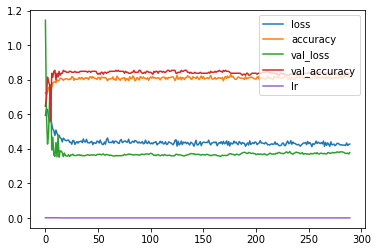

In [545]:
pd.DataFrame(model.history.history).plot()

In [576]:
pre3=(model.predict(X_test) > 0.5).astype("int32")
result=pre3.reshape(418)

In [582]:
titanic_rfc_submisssion = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": result})
titanic_rfc_submisssion.to_csv('titanic_rfc_submisssion7',index=False)